#### Importing Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset .csv file

In [110]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [111]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [113]:
df.shape

(6435, 8)

- The number of Rows and Columns are 6435 and 8

In [114]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [115]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

- There is no missing values present in the dataset

In [116]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

- As checked, the Date variable has object data-type

In [117]:
# Converting the Date data-type to datetime

In [118]:
from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'])

In [119]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [120]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


## Basic Statistics tasks

##### 1. Which store has maximum sales 

In [121]:
total_sales=df.groupby('Store')['Weekly_Sales'].sum('Weekly_Sales').round()

    # Grouping the Store number and its Weekly Sales to finding the sum of all Weekly Sales of each Store

In [122]:
pd.DataFrame(total_sales.sort_values().tail(1))

    # Sort the values and find the maximum Weekly Sales of the Store

,Weekly_Sales
Store,
20,301397792.0


- Here, the Store 20 has the maximum sales

##### 2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [123]:
df_std = df.groupby('Store')['Weekly_Sales'].std()

In [124]:
pd.DataFrame(df_std.sort_values().tail(1))

,Weekly_Sales
Store,
14,317569.949476


- The Store 14 has the maximum standard deviation

In [125]:
store_max = df[df['Store']==14].Weekly_Sales

mean_to_std = store_max.std() / store_max.mean()*100

In [126]:
mean_to_std

15.713673600948338

- The co-efficient of mean to std deviation of store 14 is 15.713%

##### 3. Which store/s has good quarterly growth rate in Q3’2012

In [127]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [128]:
q2 = df[(df['Date']>='2012-04-01')&(df['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [129]:
q2.head()

Store
1    21036966.0
2    25085124.0
3     5562668.0
4    28384185.0
5     4427262.0
Name: Weekly_Sales, dtype: float64

In [130]:
q3 = df[(df['Date']>='2012-07-01')&(df['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [131]:
q3.head()

Store
1    18633210.0
2    22396868.0
3     4966496.0
4    25652119.0
5     3880622.0
Name: Weekly_Sales, dtype: float64

In [132]:
df_q3_2012 = pd.DataFrame({'Q2 Sales':q2,'Q3 Sales':q3,'Difference':(q3 - q2),
                           'Growth Rate':(q3-q2)/q2})

df_q3_2012.sort_values(by = 'Growth Rate', ascending=False).head(1)

    # Formula of Growth Rate is (q3 - q2)/q2
    # I have taken the top store which has good Growth Rate among all

,Q2 Sales,Q3 Sales,Difference,Growth Rate
Store,,,,
16,6626133.0,6441311.0,-184822.0,-0.027893


- Here, the store 16 has good quarterly growth rate in Q3’2012 which has a Growth Rate of -0.027

##### 4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [133]:
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [134]:
Super_Bowl=['12-02-2010','11-02-2011','10-02-2012','08-02-2013']
Labour_Day = ['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
Thanksgiving = ['2010-11-26','2011-11-25','2012-11-23','2013-11-29'] 
Christmas = ['2010-12-31','2011-12-30','2012-12-28','2013-12-27']
    
    # Created a set from the holiday events description

In [135]:
Super_Bowl_Sales = round(df[df['Date'].isin(Super_Bowl)]['Weekly_Sales'].mean(),2)
Labour_Day_Sales = round(df[df['Date'].isin(Labour_Day)]['Weekly_Sales'].mean(),2)
Thanksgiving_Sales = round(df[df['Date'].isin(Thanksgiving)]['Weekly_Sales'].mean(),2)
Christmas_Sales = round(df[df['Date'].isin(Christmas)]['Weekly_Sales'].mean(),2)
non_holiday_sales = round(df[df['Holiday_Flag']==0]['Weekly_Sales'].mean(),2)

In [136]:
print('Super bowl: ' + str(Super_Bowl_Sales))
print('Labour Day: ' + str(Labour_Day_Sales))
print('Thanksgiving: ' + str(Thanksgiving_Sales))
print('Christmas: ' + str(Christmas_Sales))
print('Non-Holiday sales: ' +str(non_holiday_sales))

Super bowl: 1079127.99
Labour Day: 1039182.83
Thanksgiving: 1471273.43
Christmas: 960833.11
Non-Holiday sales: 1041256.38


- Here, Thanksgiving has the highest sales than the mean sales in non-holiday season for all stores 

##### 5. Provide a monthly and semester view of sales in units and give insights

In [137]:
# Monthy view of Sales in units

In [138]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

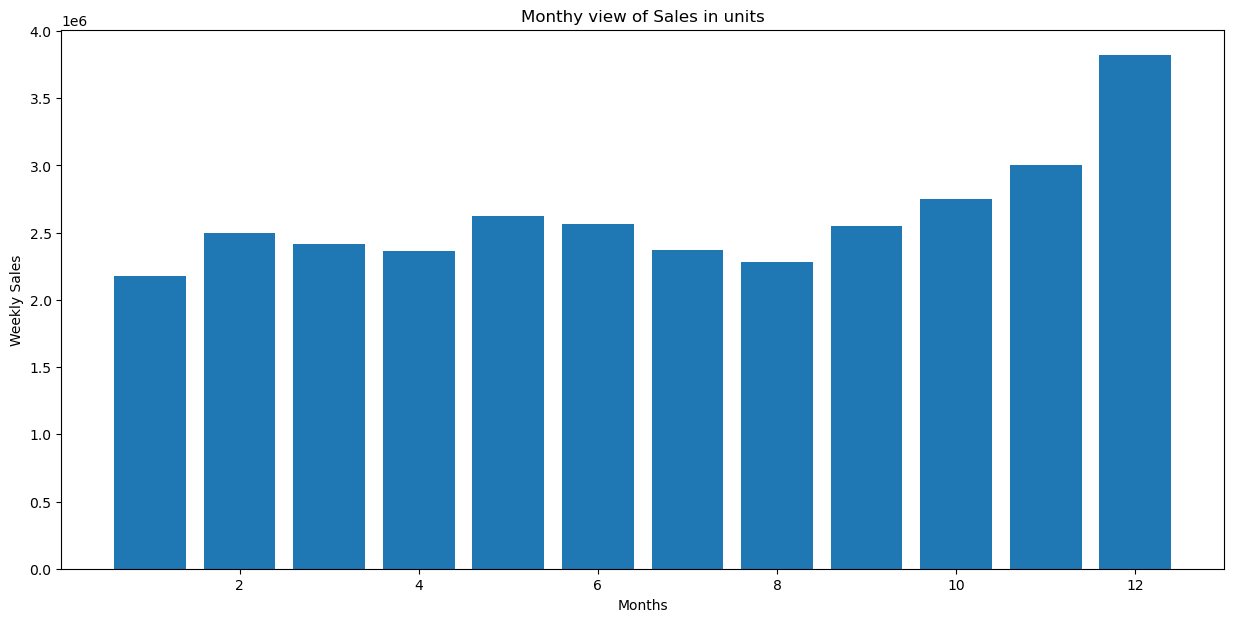

In [139]:
plt.figure(figsize=(15,7))

plt.bar(df['month'],df['Weekly_Sales'])
plt.xlabel('Months') 
plt.ylabel('Weekly Sales')

plt.title('Monthy view of Sales in units')
plt.show()

- Here, December has the highest sales

In [140]:
# Semester view of Sales in units

In [141]:
df['semester'] = np.where(df['month']< 7,1,2)
df['semester']

0       1
1       2
2       1
3       1
4       1
       ..
6430    2
6431    1
6432    2
6433    2
6434    2
Name: semester, Length: 6435, dtype: int32

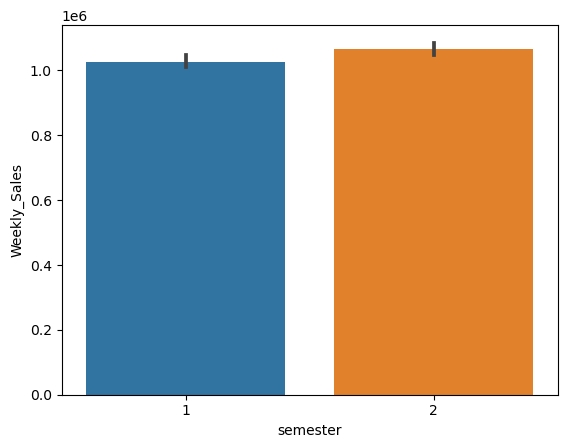

In [142]:
semester=sns.barplot(x='semester',y='Weekly_Sales',data=df)
plt.show()

- Here, Semester 2 has the hightest sales in unit

## Statistical Model

In [143]:
X = df[['Store','Fuel_Price','CPI','Unemployment','day','month','year']]
Y = df['Weekly_Sales']

In [144]:
# Linear Regression model

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [147]:
linear_reg = LinearRegression()

In [148]:
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [151]:
Y_pred = linear_reg.predict(X_test)

In [152]:
print('R2 score: ' +str(r2_score(Y_test, Y_pred)))
print('Linear model accuracy: ' +str(linear_reg.score(X_train, Y_train)))
print('Mean Squared Error: ' +str(mean_squared_error(Y_test, Y_pred)))

R2 score: 0.14894500845355385
Linear model accuracy: 0.14372803259754718
Mean Squared Error: 274171250281.01086


In [153]:
# Plot a scatterplot graph

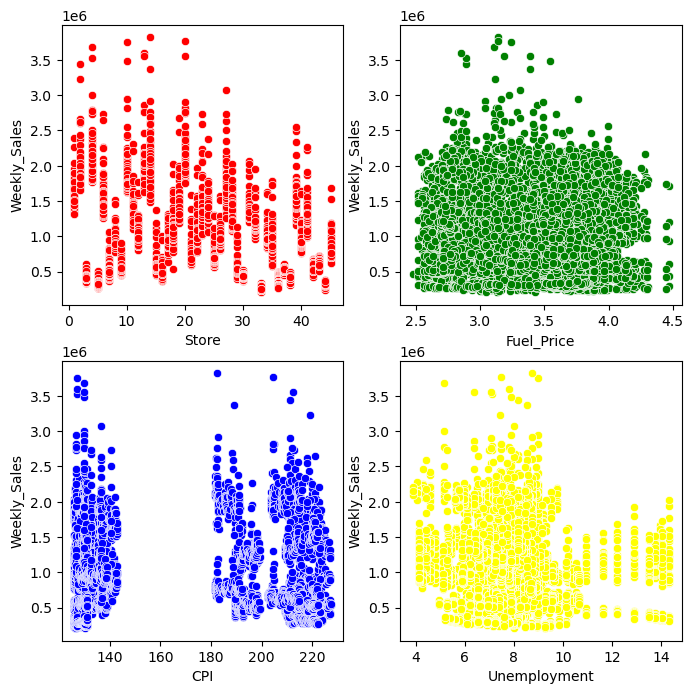

In [154]:
figs,axes = plt.subplots(2,2, figsize = (8,8))

sns.scatterplot(data=df, x='Store', y='Weekly_Sales', color='red', ax=axes[0,0])
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', color='green', ax=axes[0,1])
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', color='blue', ax=axes[1,0])
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', color='yellow', ax=axes[1,1])

plt.show()

- Linear Regression is not good fit for the model

In [155]:
# Random Forest Model

In [156]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,3.474318e-12,6.289676e-16,-1.070464e-15,5.868729e-16
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.837754e-02,6.753523e-02,-1.487292e-02,3.535312e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-5.678257e-02,3.322341e-01,-3.603594e-02,2.761285e-01
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.426923e-02,6.643970e-02,8.901925e-02,1.303141e-01
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,7.794703e-01,-5.283174e-02,3.253169e-02,-6.194830e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,7.479573e-02,1.478843e-03,3.965821e-03,2.291341e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.418135e-01,-2.061552e-03,-8.166853e-03,-9.497961e-03
year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,1.000000e+00,-1.390145e-01,-1.277942e-02,-9.683011e-02
month,6.289676e-16,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,-1.390145e-01,1.000000e+00,5.959249e-03,8.642165e-01
day,-1.070464e-15,-0.014873,-3.603594e-02,0.089019,0.032532,0.003966,-0.008167,-1.277942e-02,5.959249e-03,1.000000e+00,3.487338e-02


In [157]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
rf = RandomForestRegressor(n_estimators = 500, max_depth=15, n_jobs=5)        
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=15, n_estimators=500, n_jobs=5)

In [176]:
Y_pred=rf.predict(X_test)

In [177]:
print('R2 score: ' +str(r2_score(Y_test, Y_pred)))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('Mean Squared Error: ' +str(mean_squared_error(Y_test, Y_pred)))

R2 score: 0.9524234944111671
Root Mean Squared Error: 123802.21502366115
Mean Squared Error: 15326988444.76483


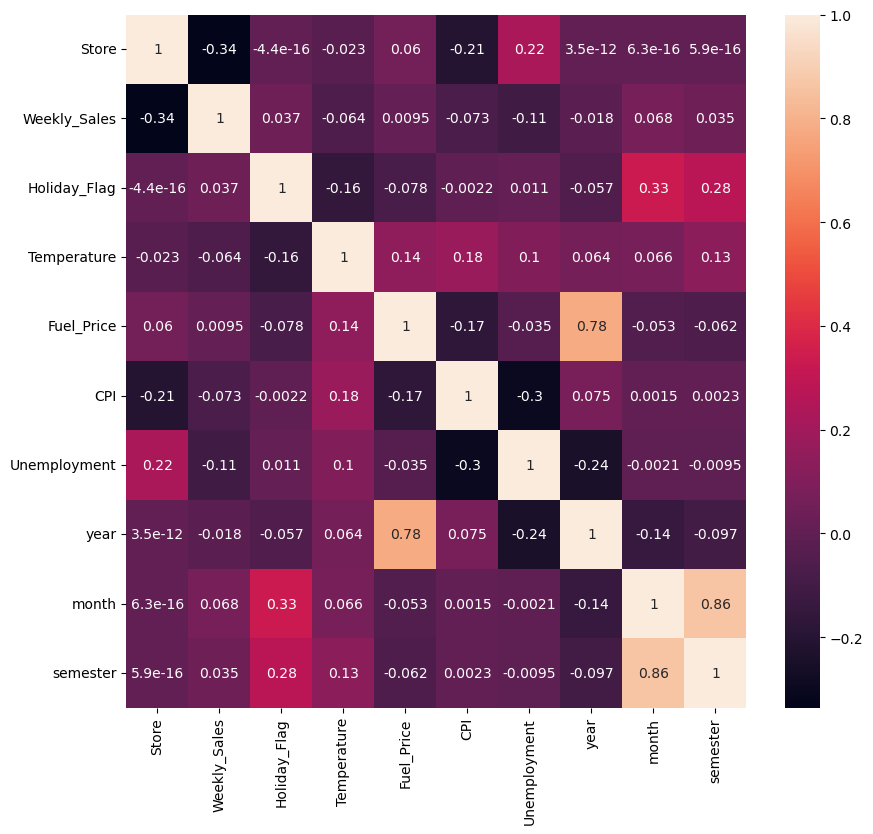

In [178]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

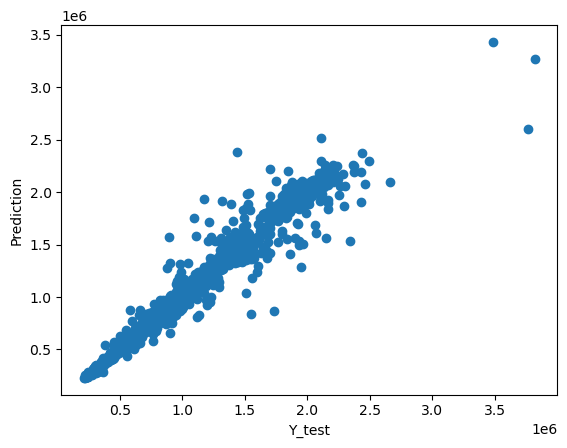

In [179]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Prediction')
plt.show()

- For Random Forest Regressor <br>
        R2 score: R2 score: 0.9524234944111671 <br>
        Root Mean Squared Error: 123802.21502366115 <br>
        Mean Squared Error: 15326988444.76483
        

- The Random Forest Regressor model would be the best fit for the outcome

##### 2. Change dates into days by creating new variable.

In [164]:
df['day'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday,1
